In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1193,2020-08-03,United Kingdom,305025.0,304695.0,46346.0,46201.0,330.0,145.0
1194,2020-08-03,Germany,210831.0,210402.0,9148.0,9148.0,429.0,0.0
1195,2020-08-03,Iran,310359.0,309437.0,17186.0,17190.0,922.0,-4.0
1196,2020-08-03,Turkey,232786.0,232856.0,5726.0,5728.0,-70.0,-2.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  3814.423205342237
RMSE =  11638.974752298462


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  290.8480801335559
RMSE =  687.2214724917698


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  21485.191304347827
RMSE =  34160.9000913643
-- World performances for deaths --
MAE =  1569.8521739130435
RMSE =  1908.3582176720706


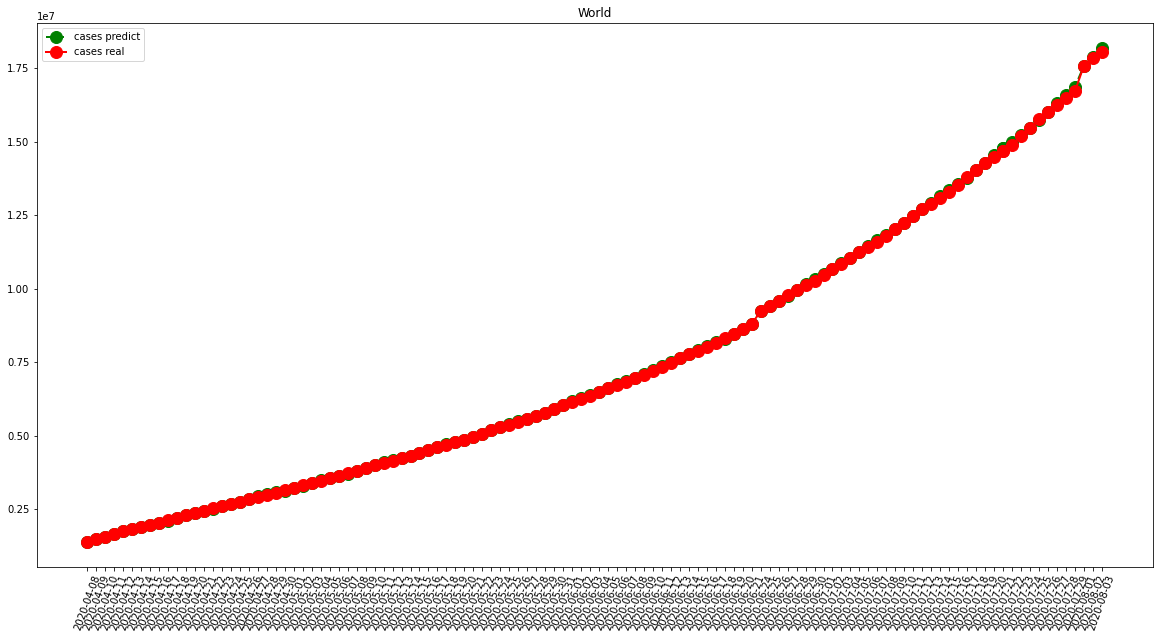

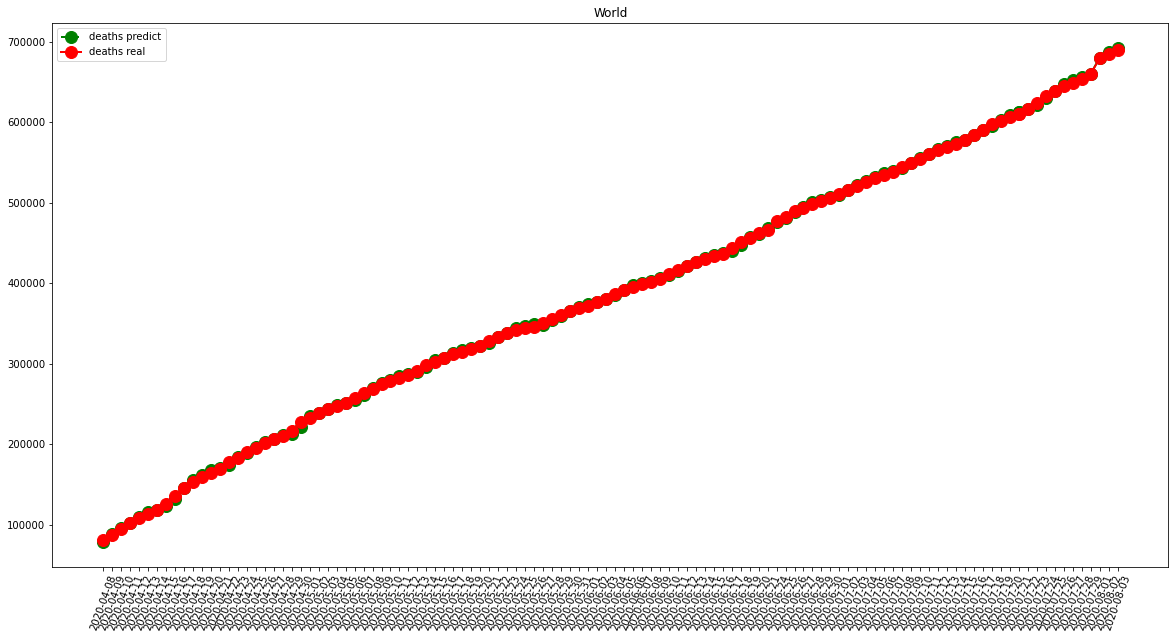

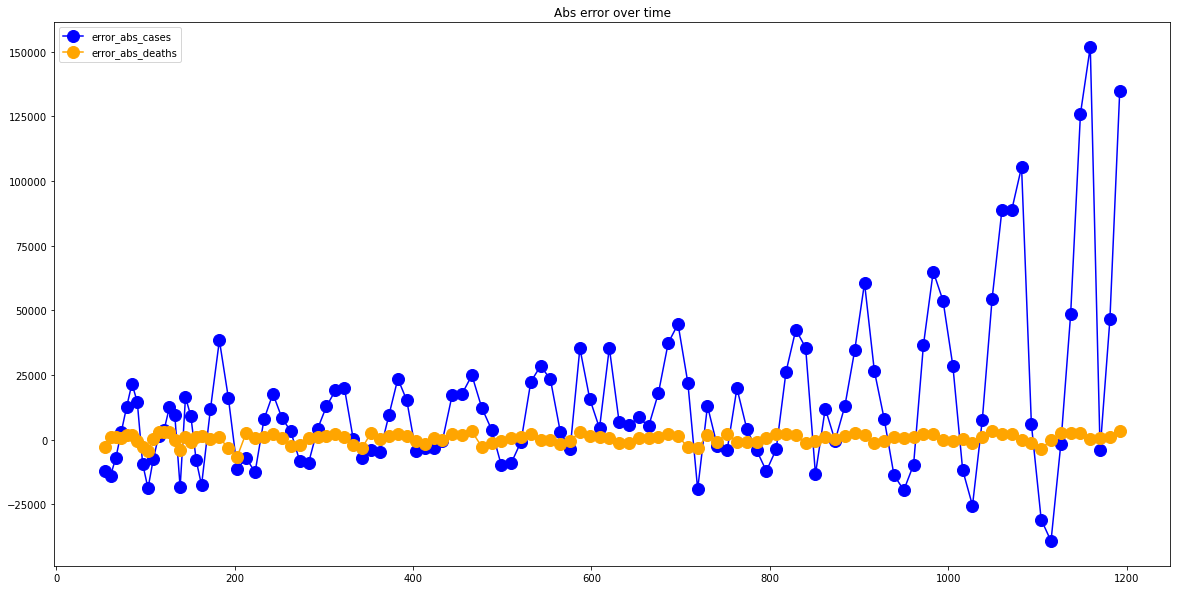

In [7]:
visShow("World")

-- France performances for cases --
MAE =  855.072
RMSE =  1366.0851803602877
-- France performances for deaths --
MAE =  144.984
RMSE =  299.8022414859502


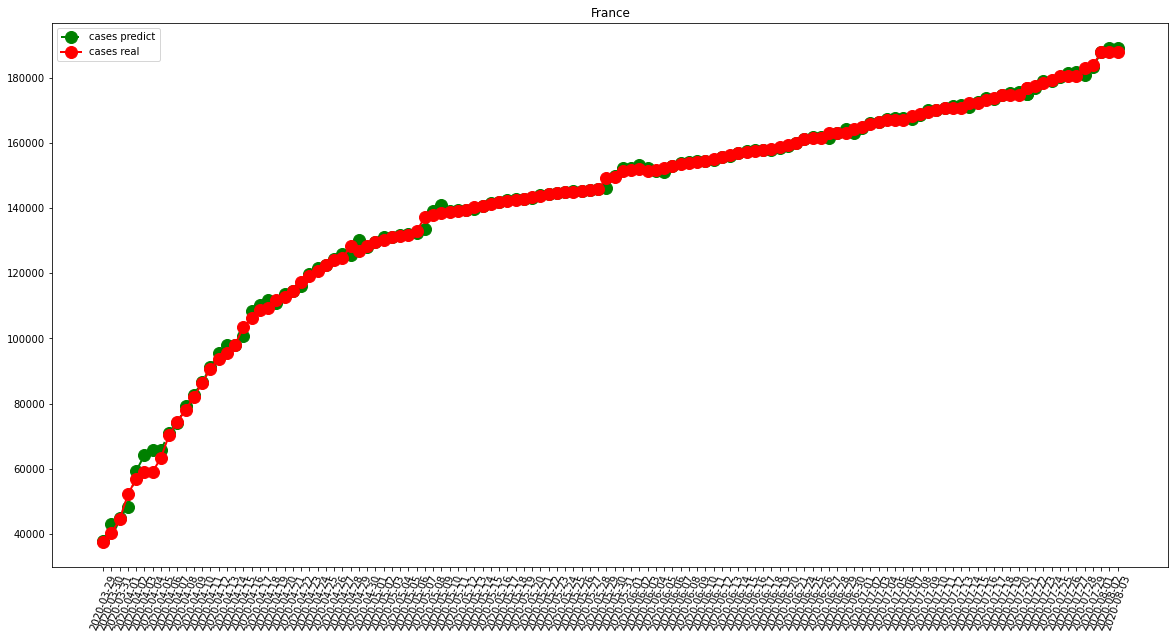

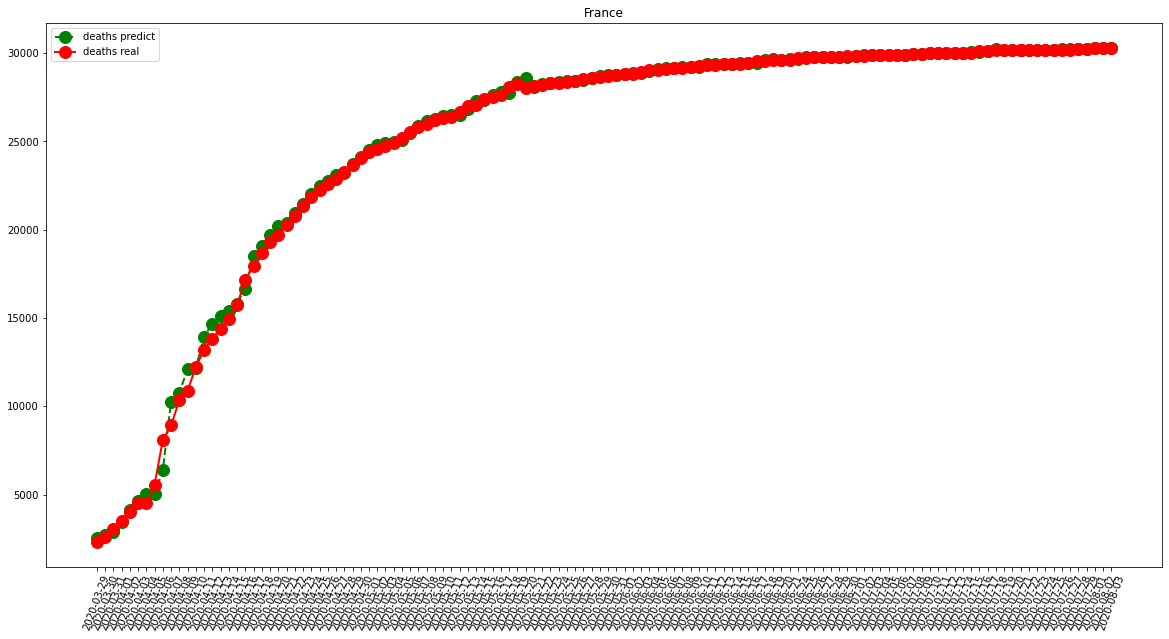

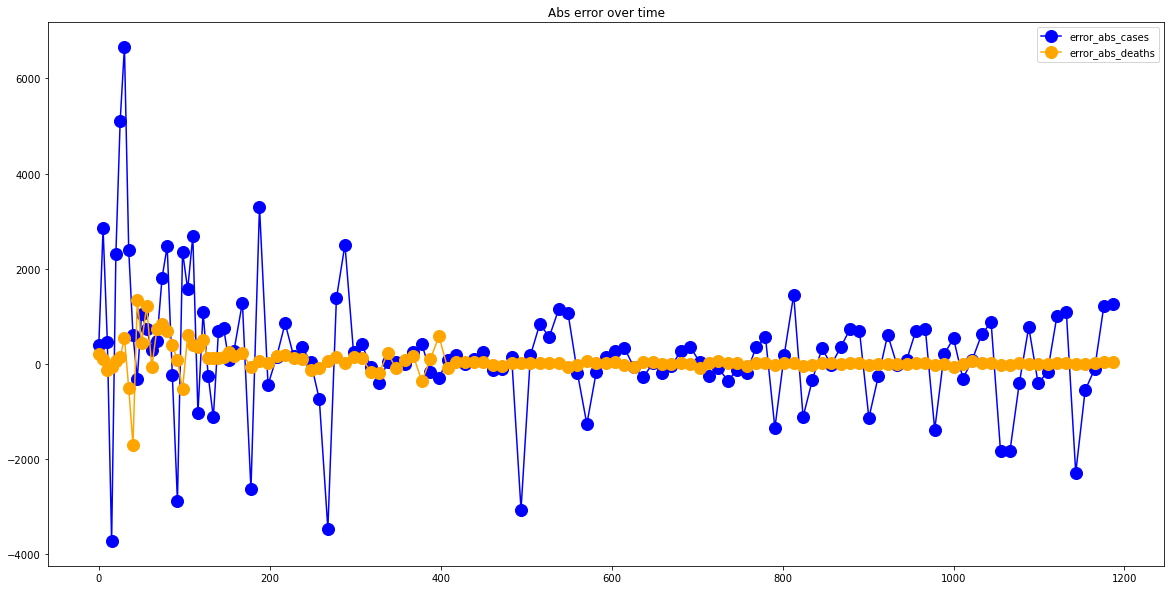

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  323.808
RMSE =  489.55820083009536
-- Italy performances for deaths --
MAE =  82.736
RMSE =  264.7363669766585


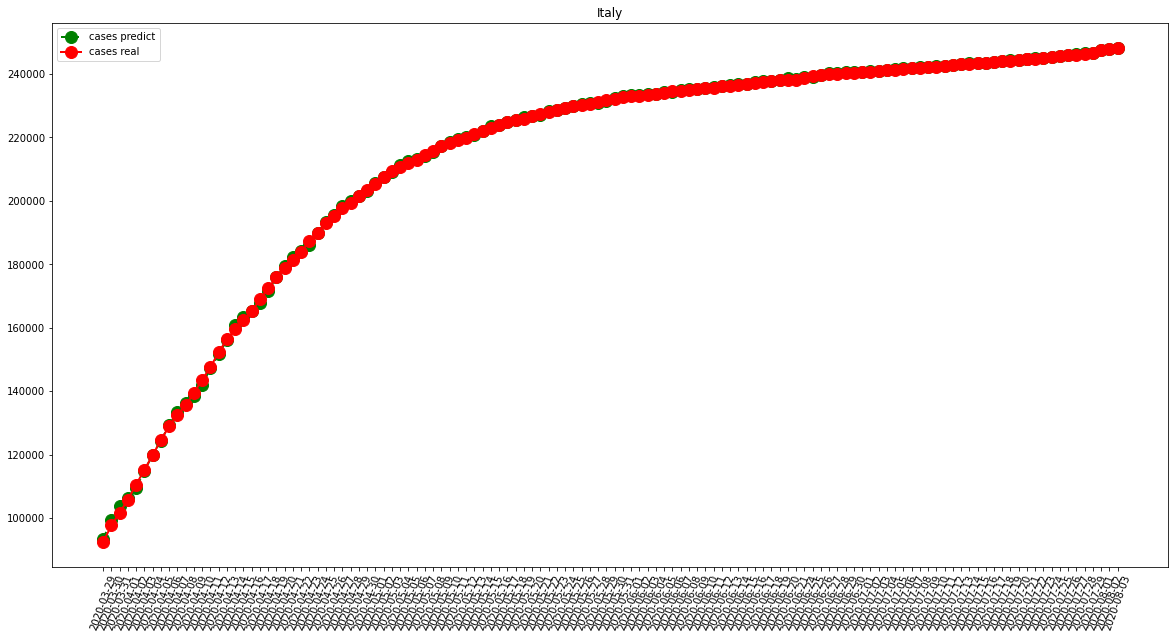

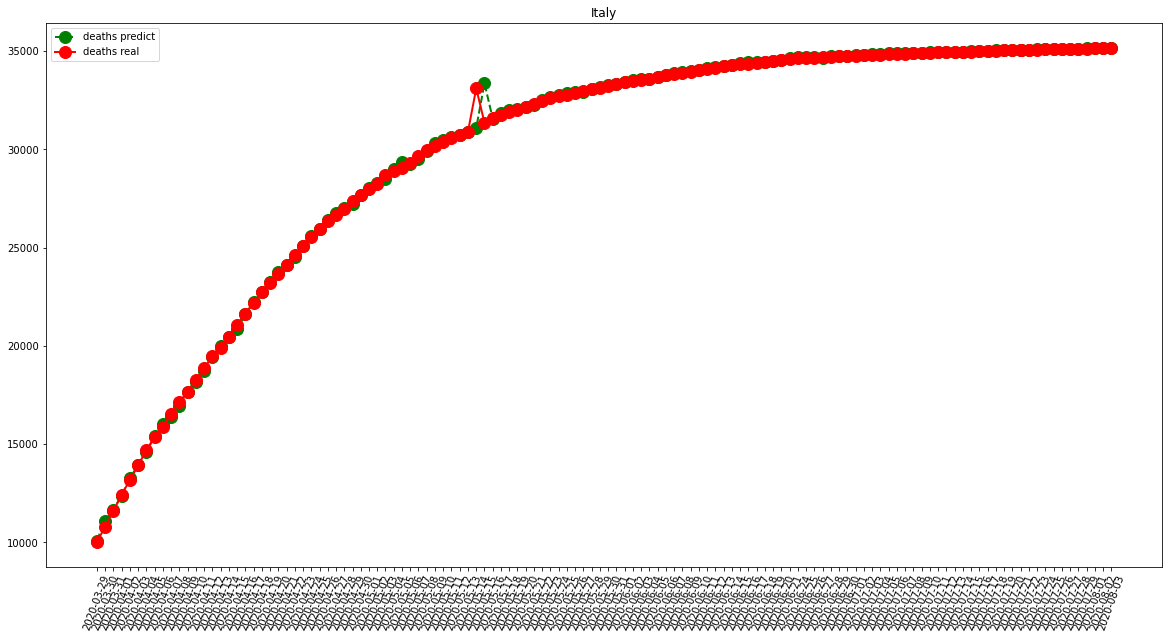

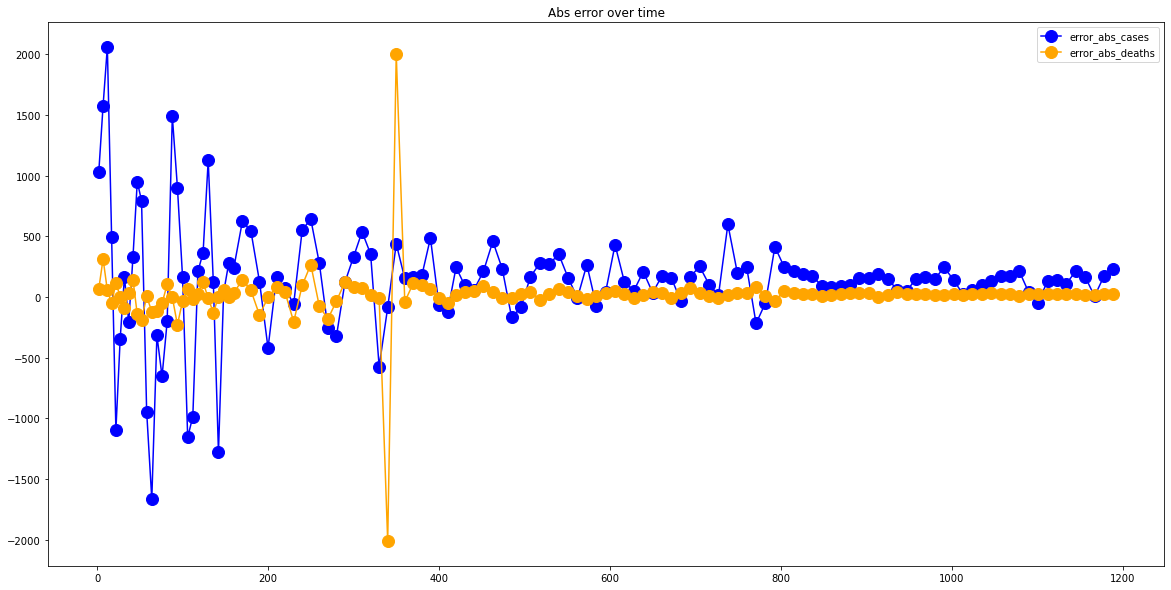

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  1038.024
RMSE =  2096.5295762282963
-- Spain performances for deaths --
MAE =  147.448
RMSE =  363.0713318343931


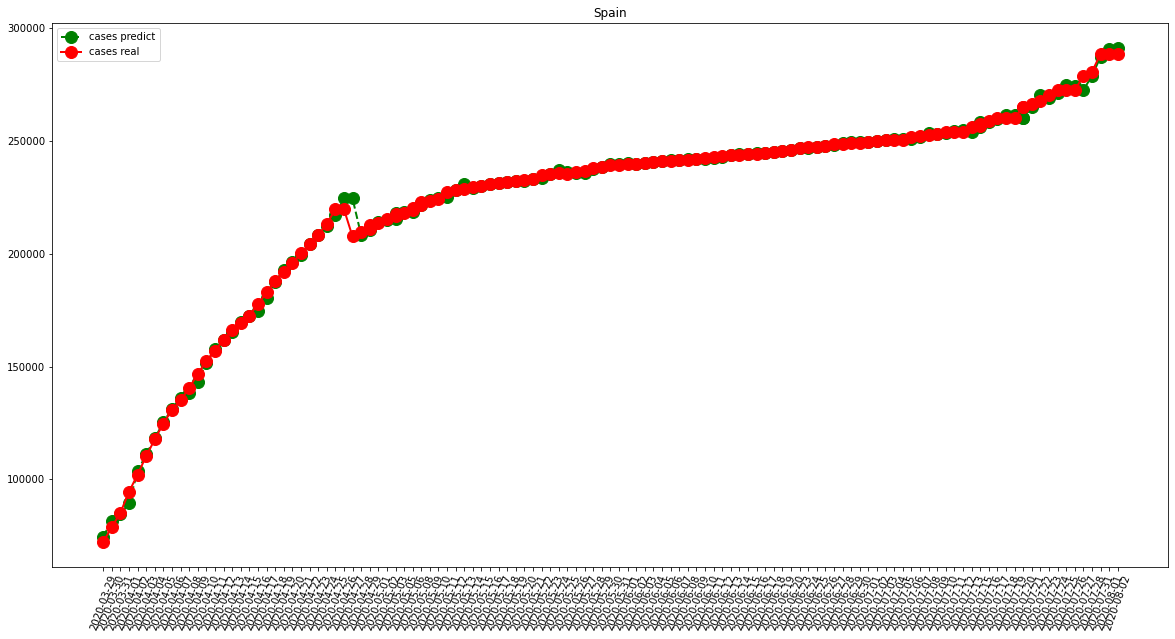

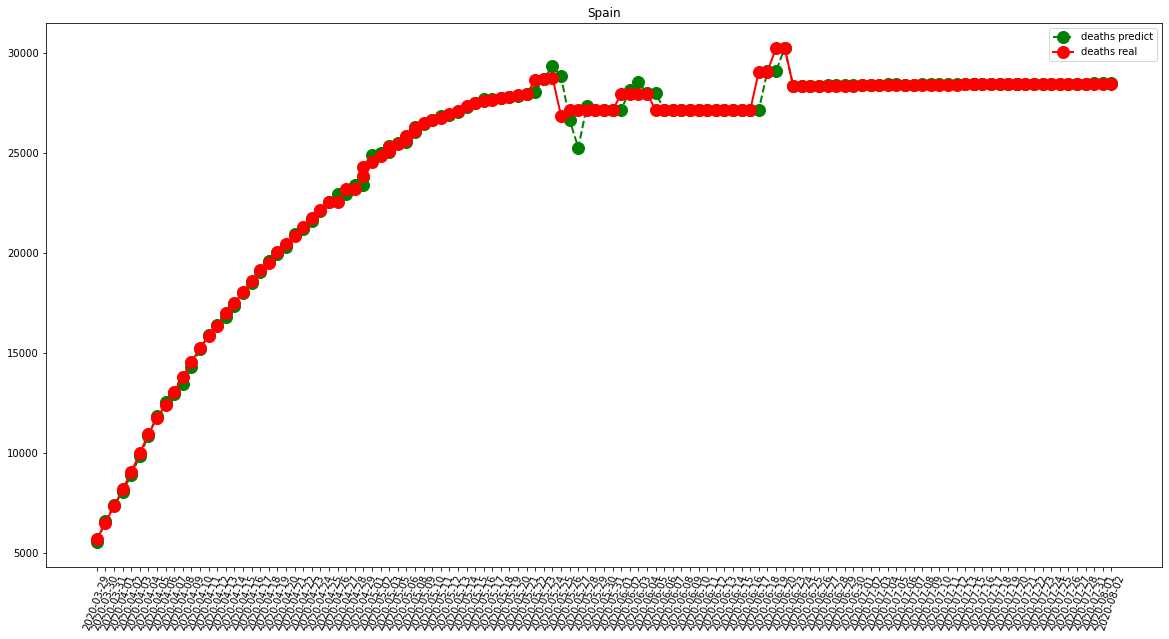

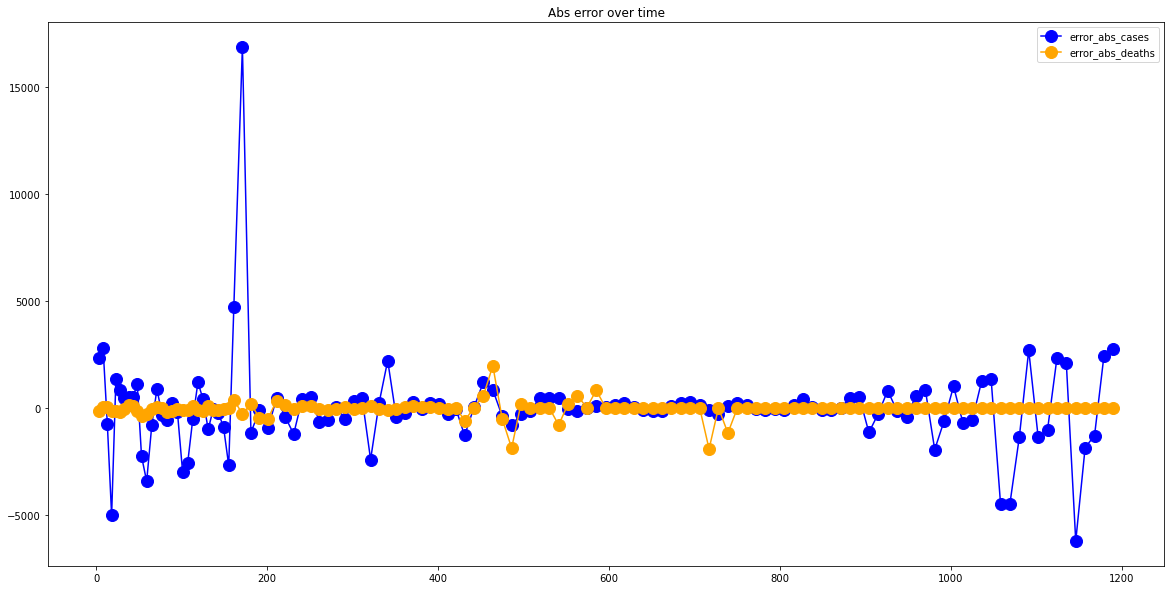

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  6099.0
RMSE =  8382.729972031784
-- United States performances for deaths --
MAE =  500.136
RMSE =  724.4967743199413


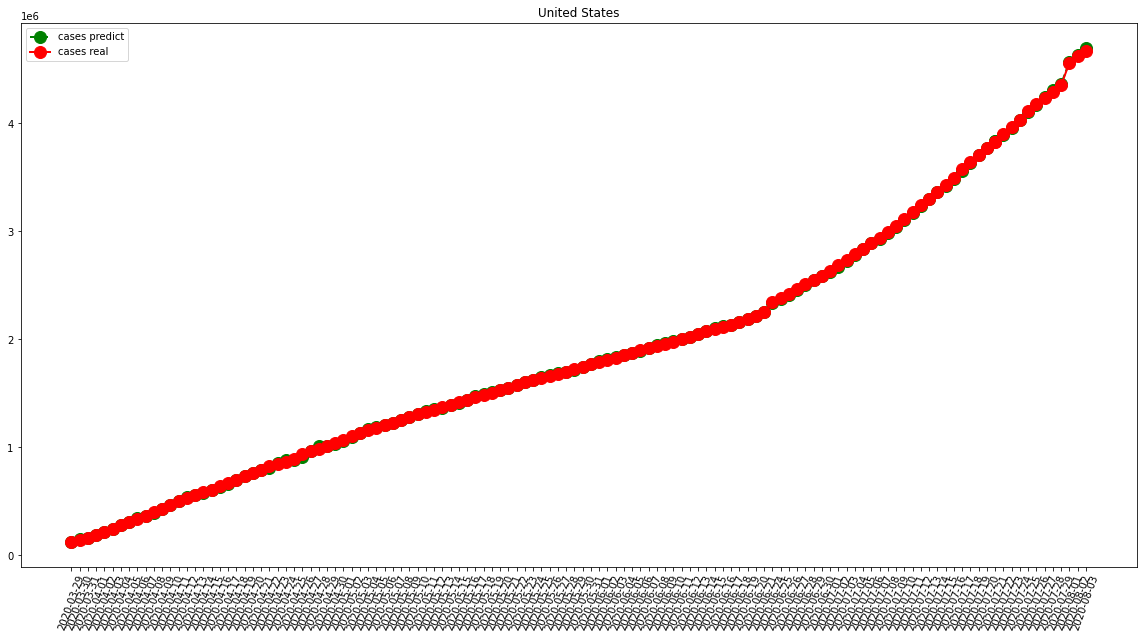

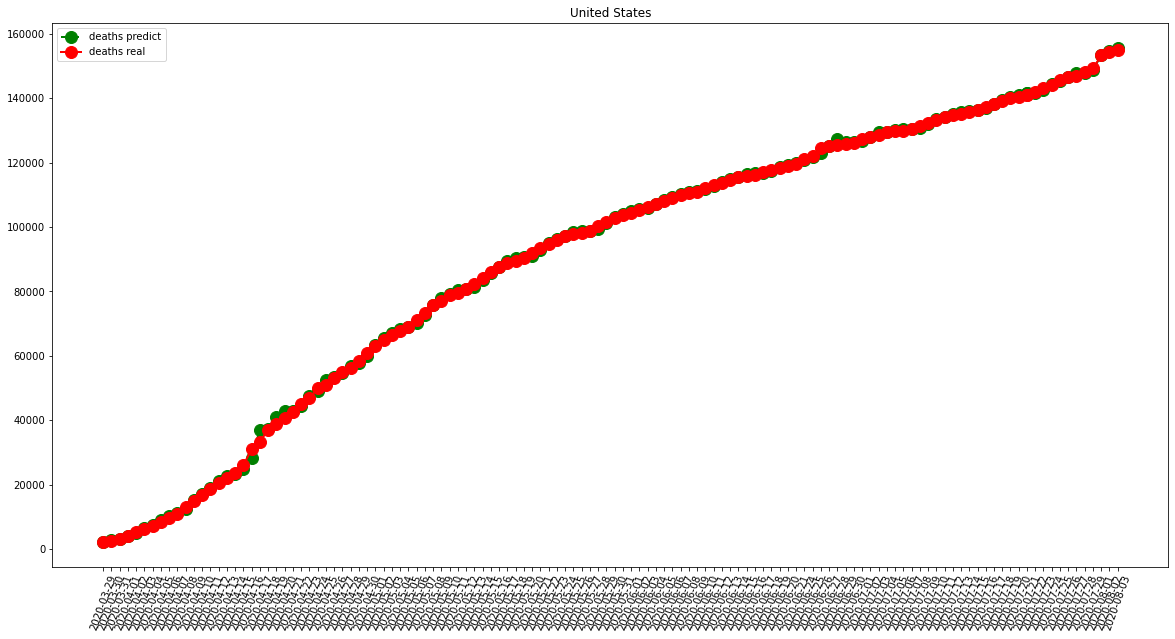

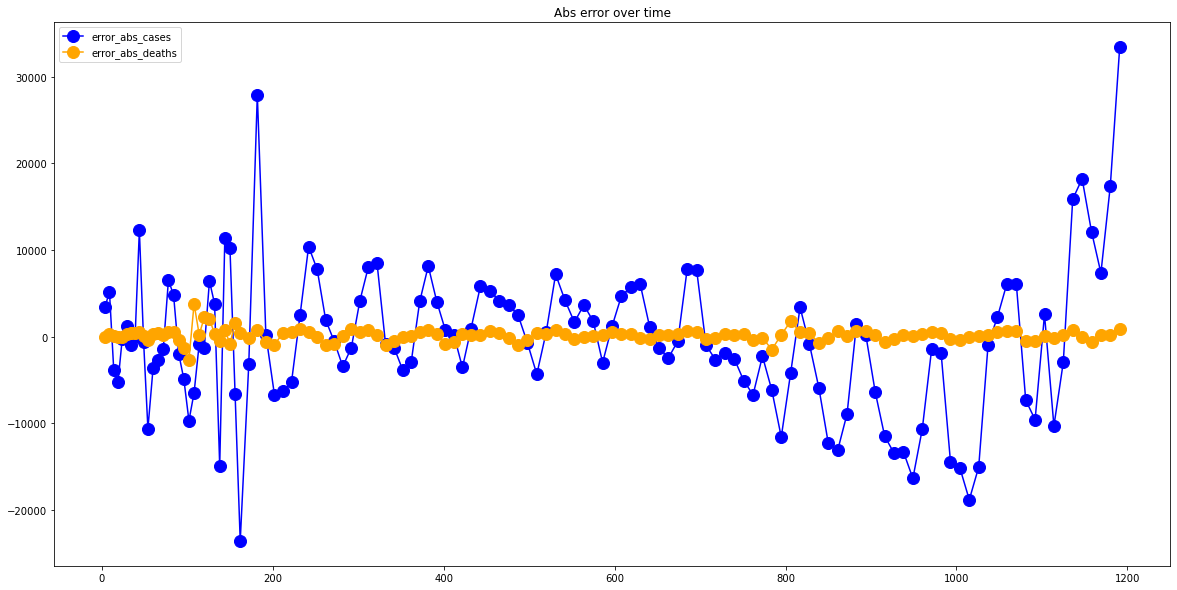

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  77.096
RMSE =  106.4112400078112
-- China performances for deaths --
MAE =  32.232
RMSE =  140.42293260005647


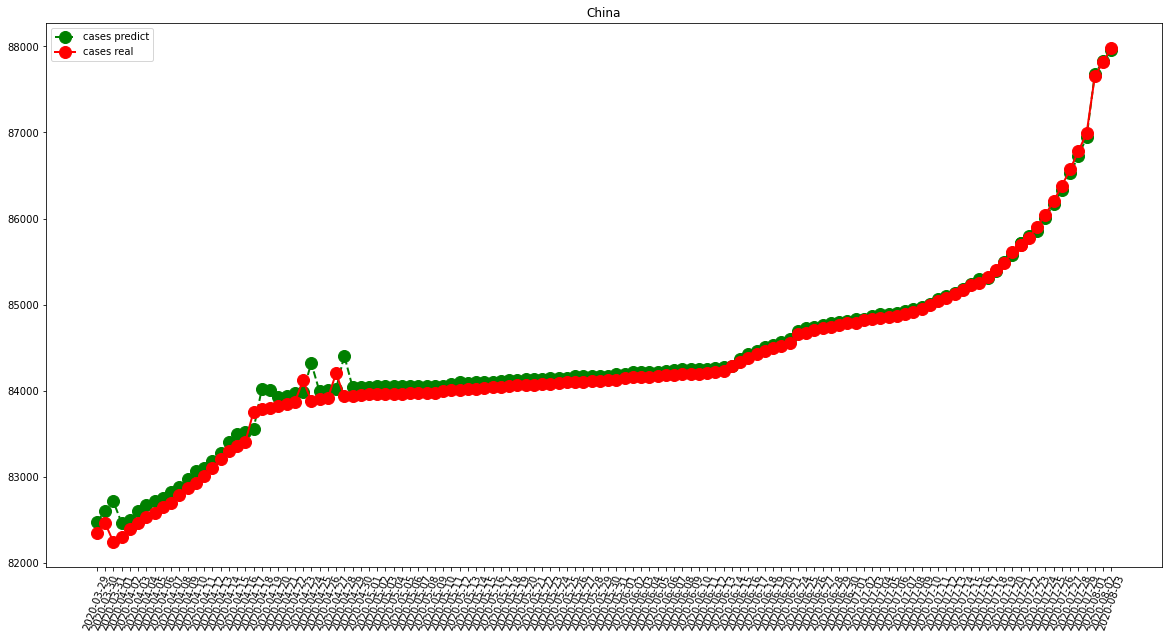

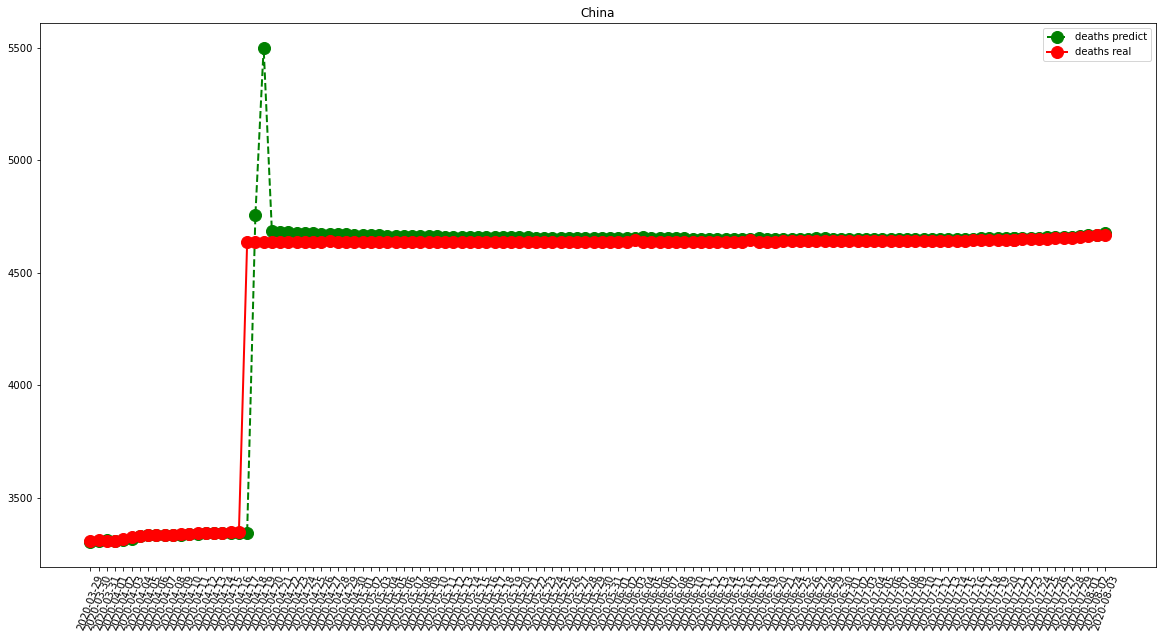

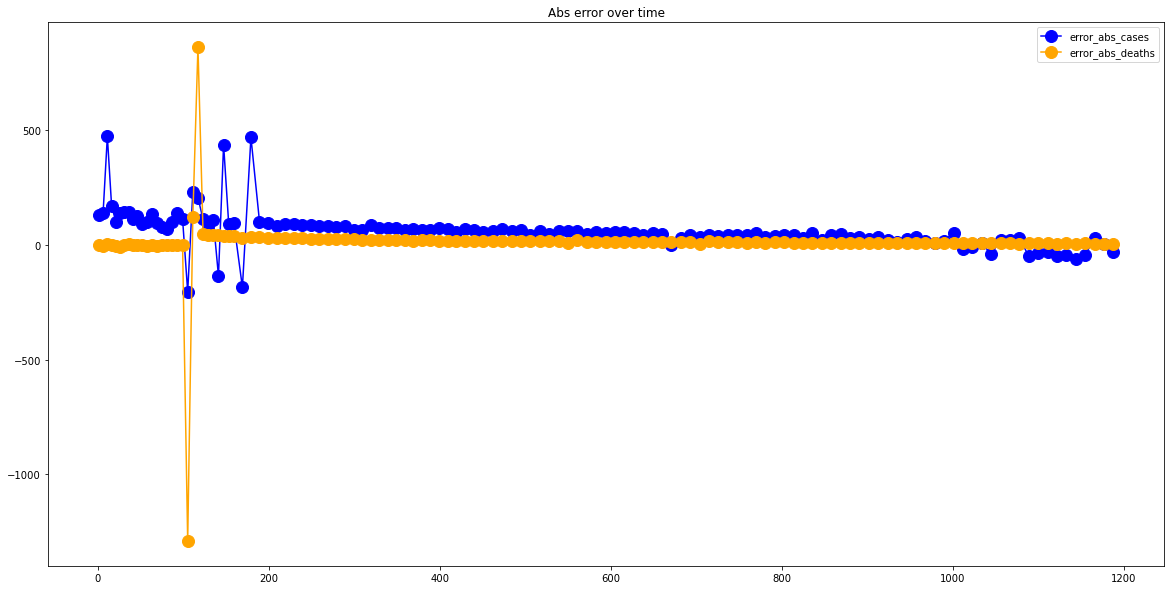

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1268.639175257732
RMSE =  4237.835673533872
-- United Kingdom performances for deaths --
MAE =  198.90721649484536
RMSE =  498.5167070585447


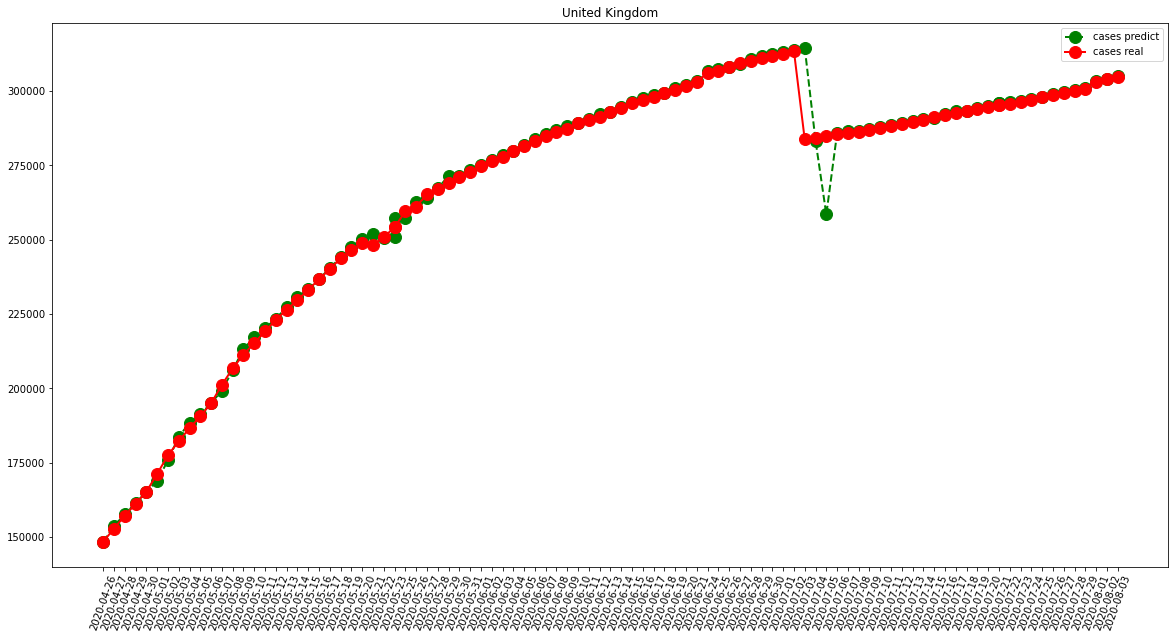

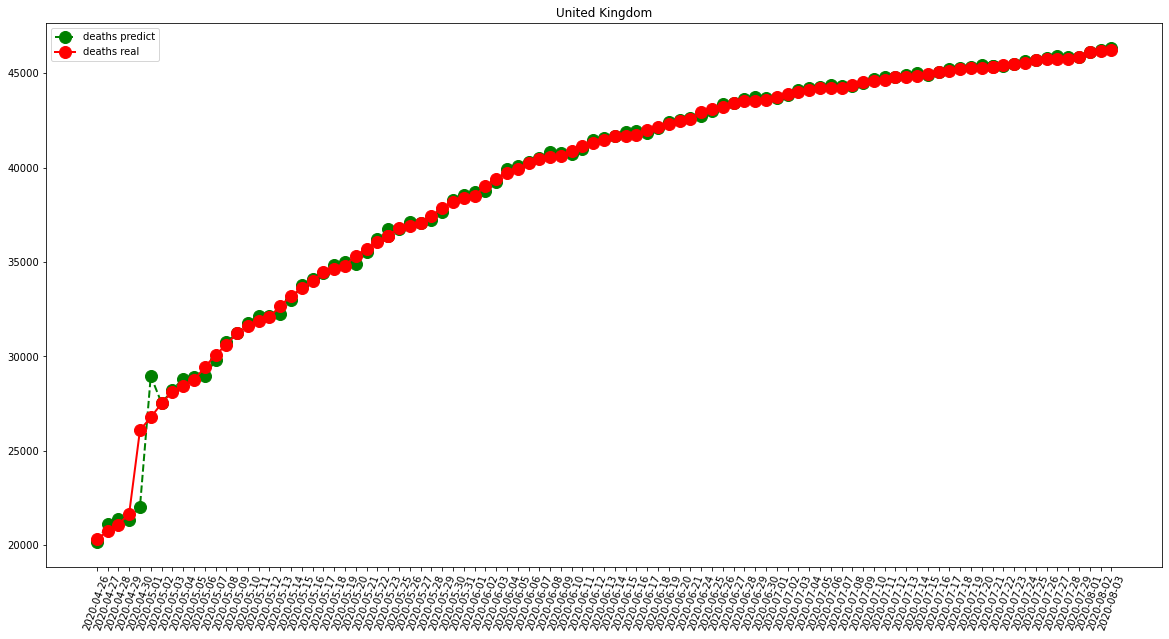

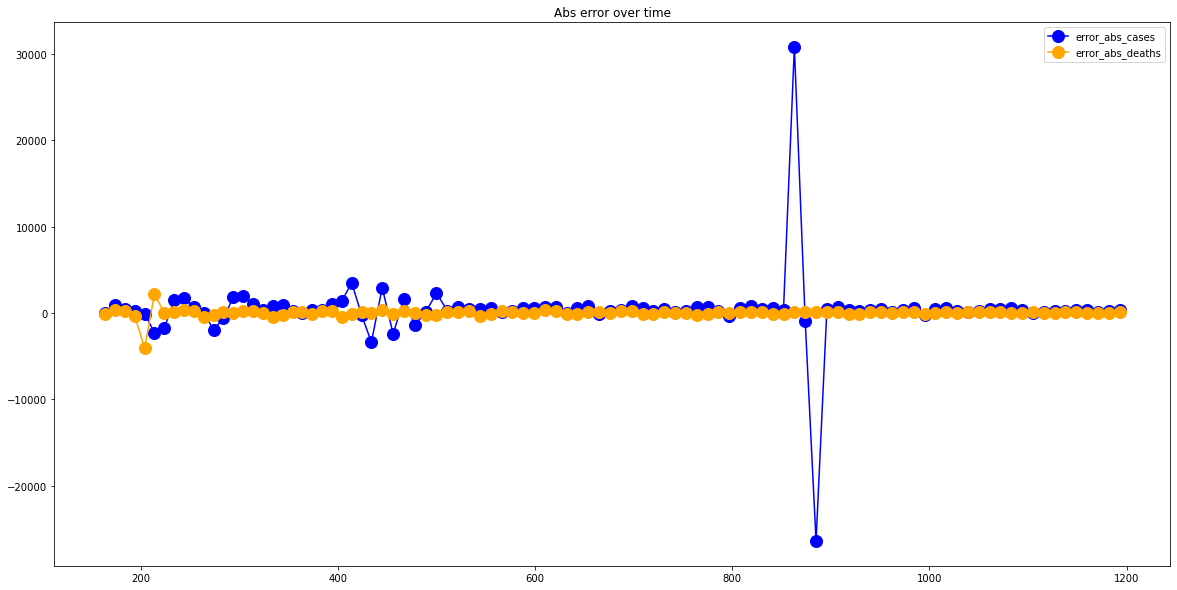

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  313.1546391752577
RMSE =  442.84953577959885
-- Germany performances for deaths --
MAE =  25.195876288659793
RMSE =  44.43946421123283


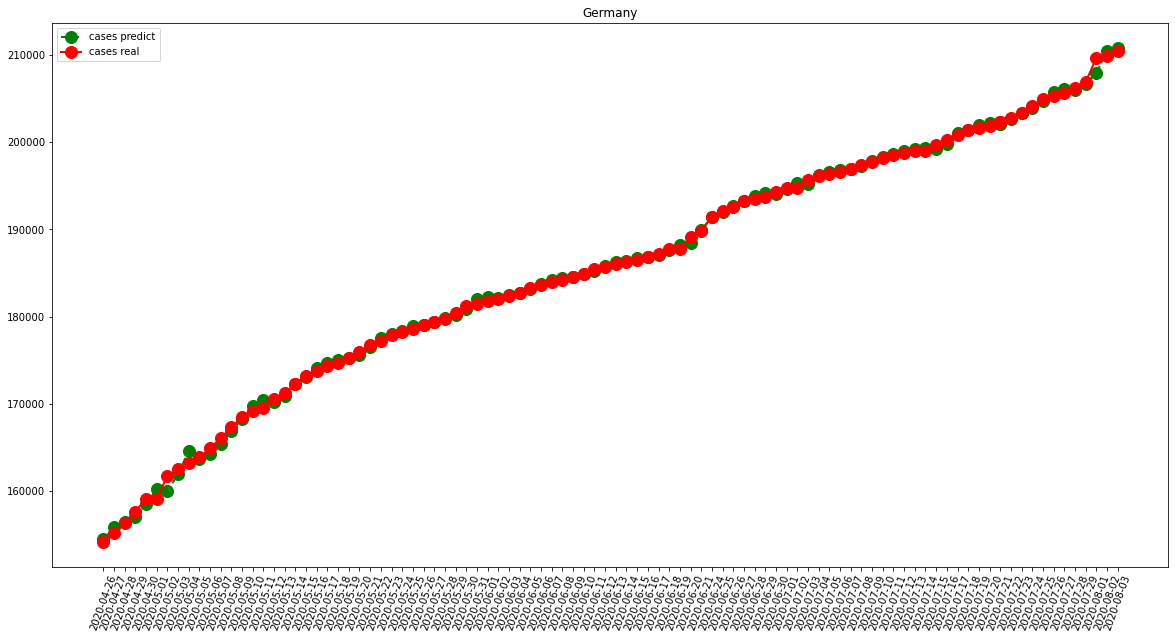

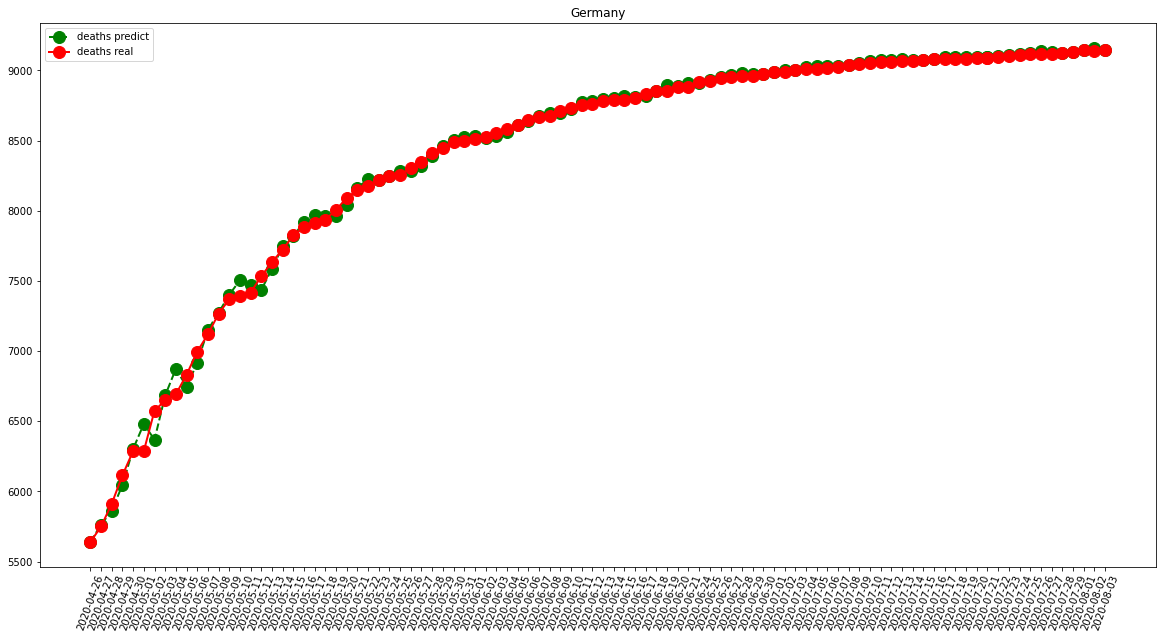

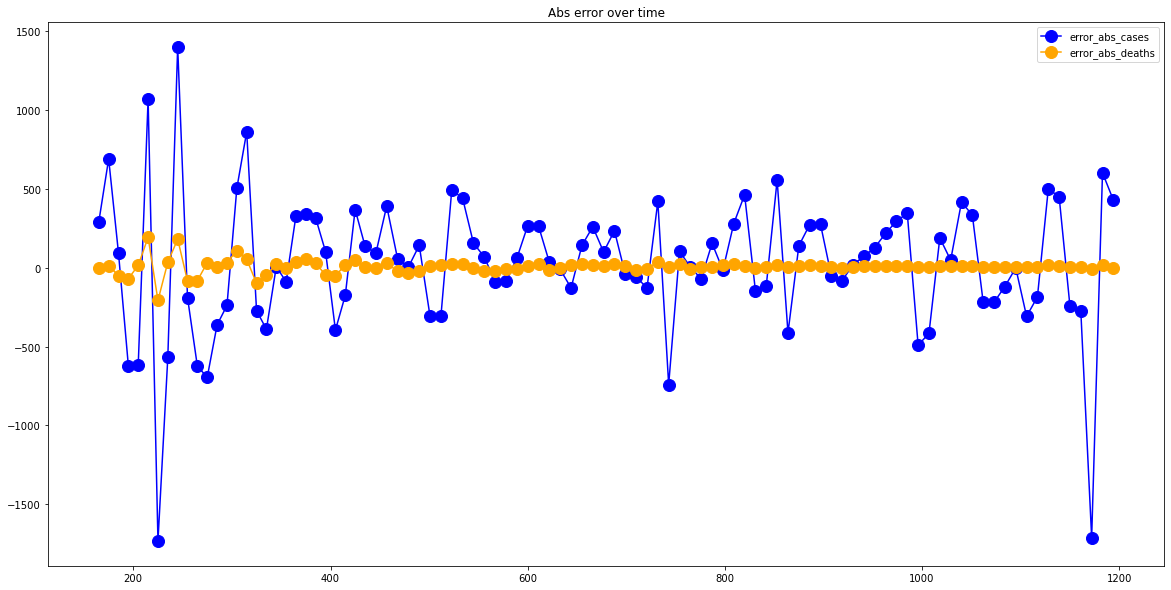

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  557.1443298969073
RMSE =  872.86400849135
-- Iran performances for deaths --
MAE =  30.84536082474227
RMSE =  68.95224703469802


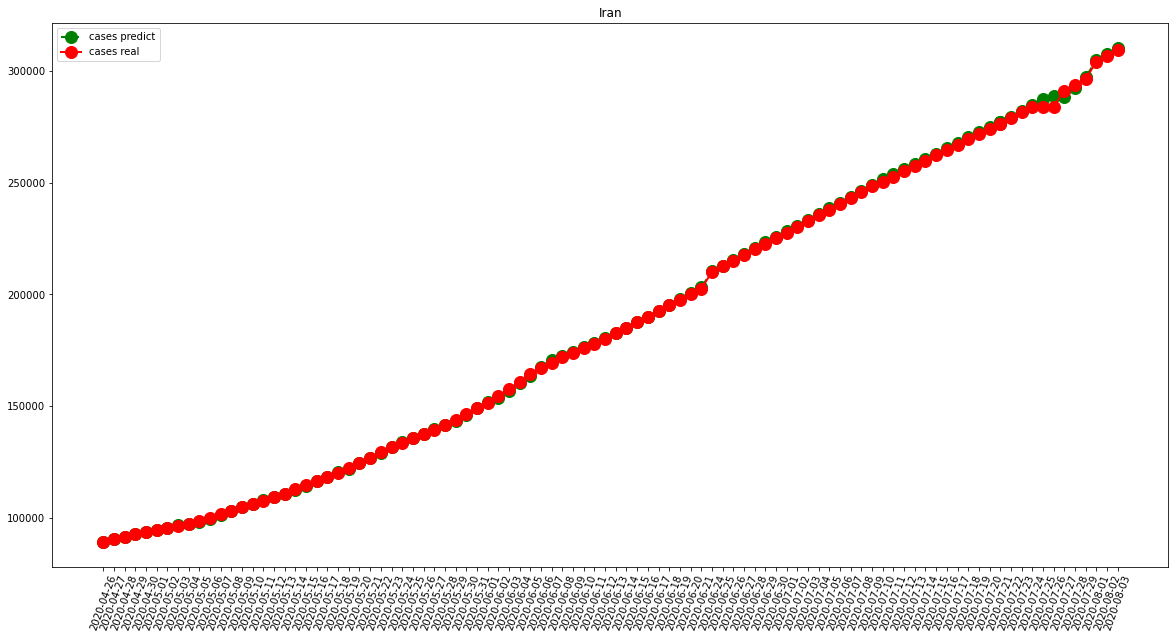

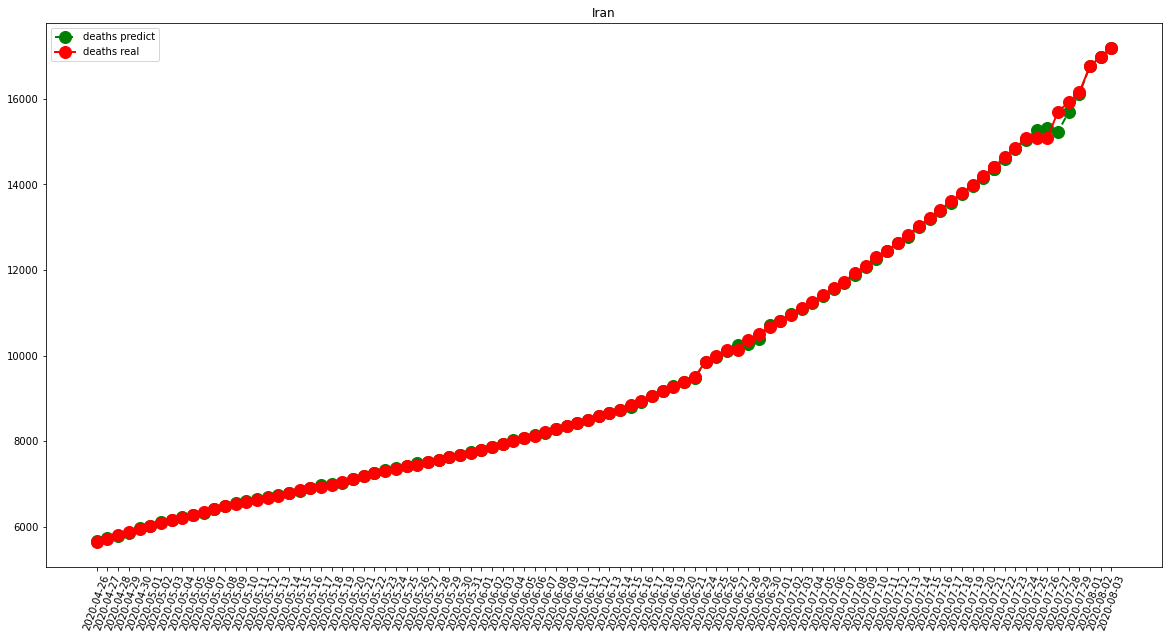

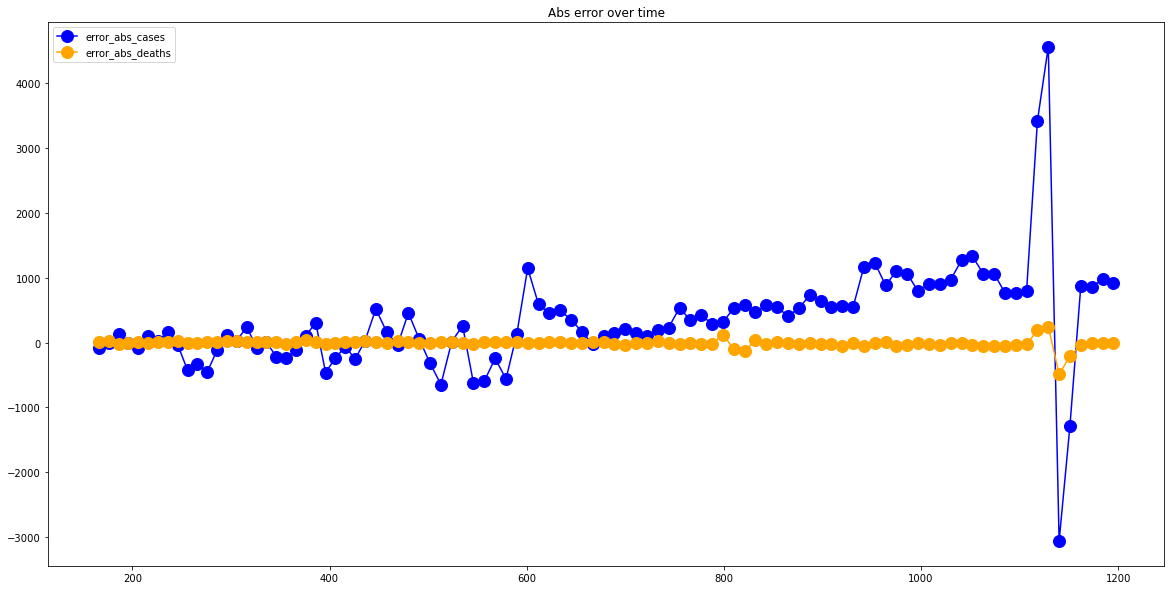

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  202.2680412371134
RMSE =  349.4044122488568
-- Turkey performances for deaths --
MAE =  19.50515463917526
RMSE =  103.06808879490806


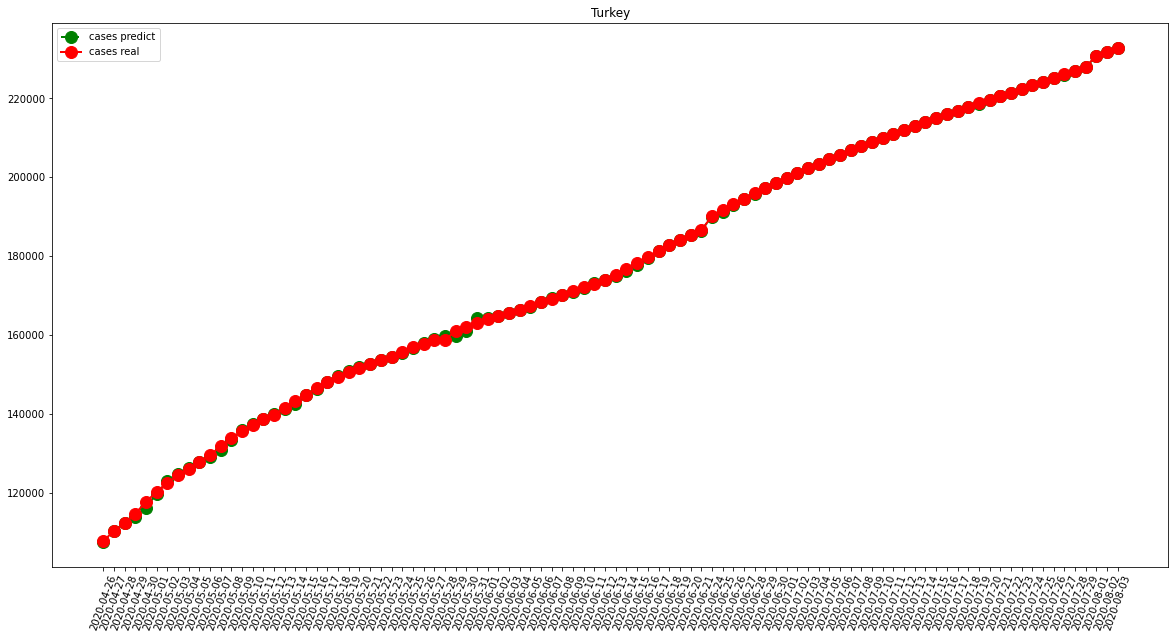

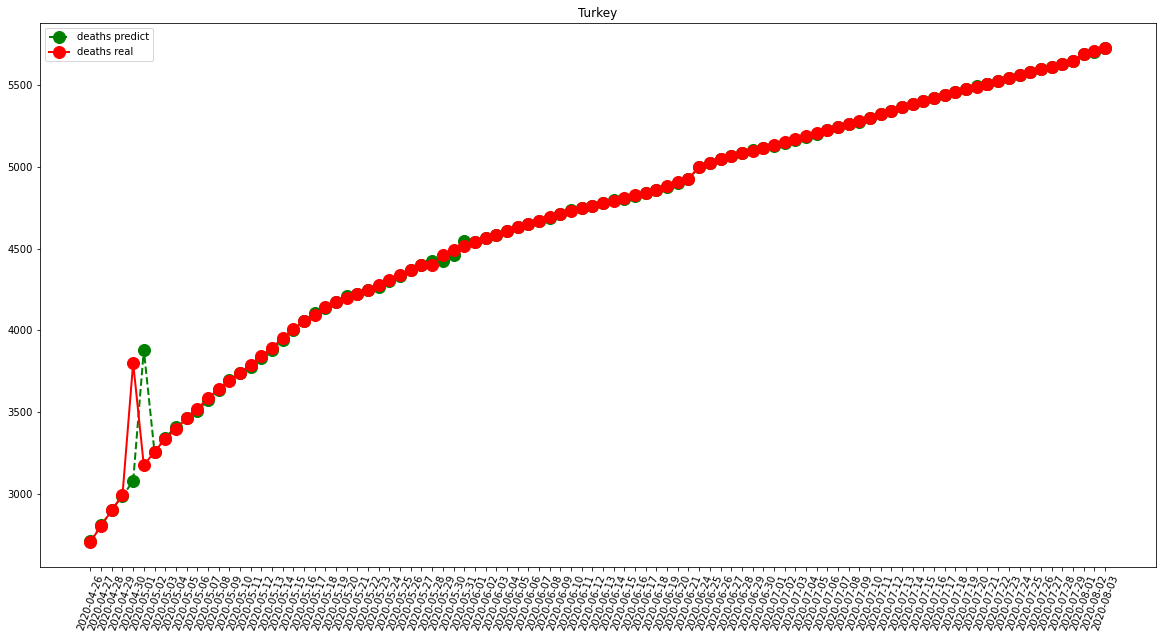

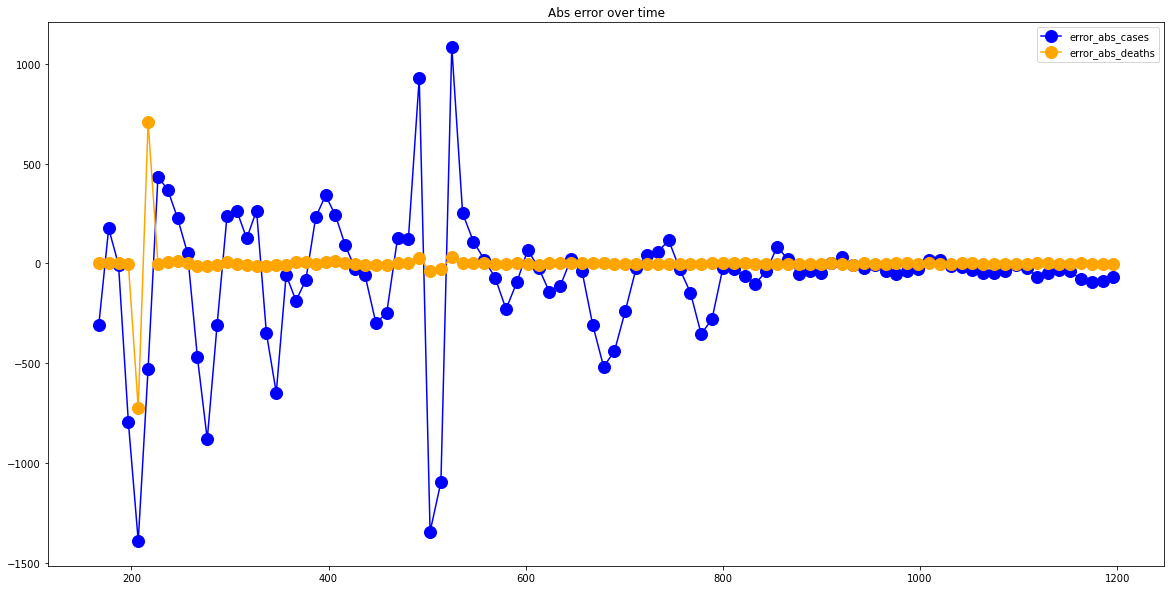

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  11752.285714285714
RMSE =  15418.944381136194
-- Brazil performances for deaths --
MAE =  397.7
RMSE =  487.4596100484341


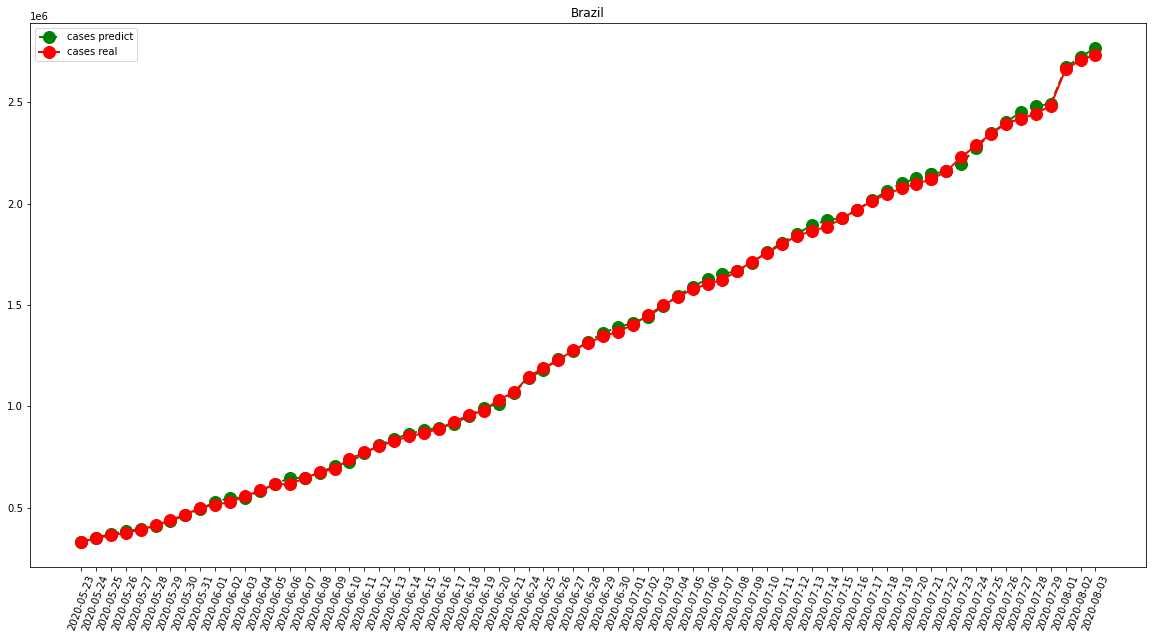

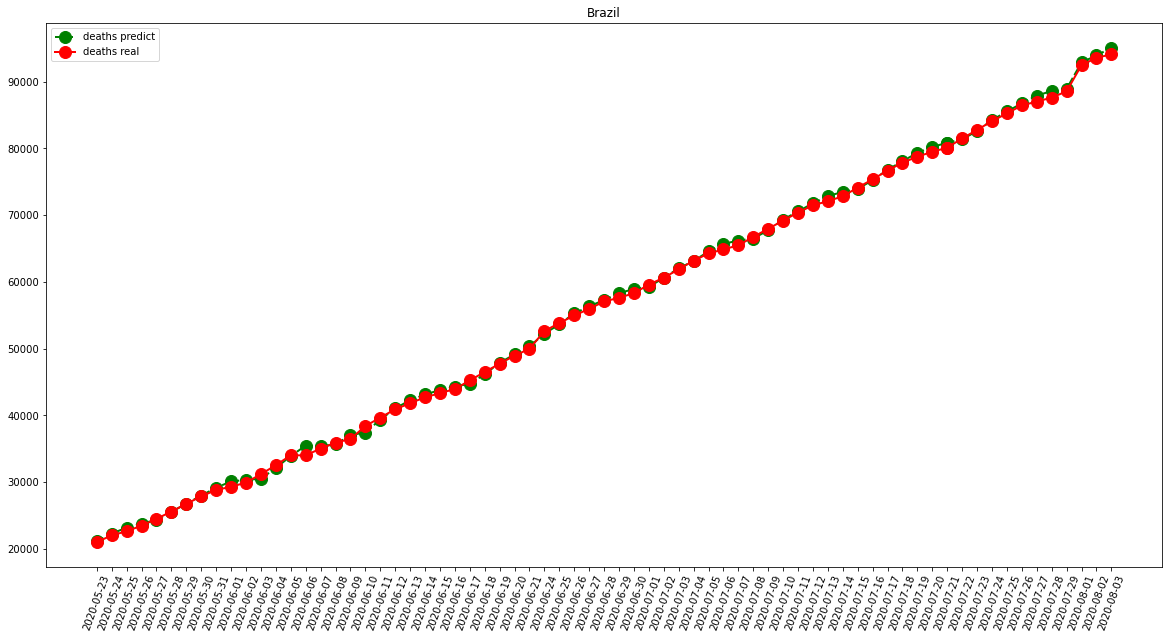

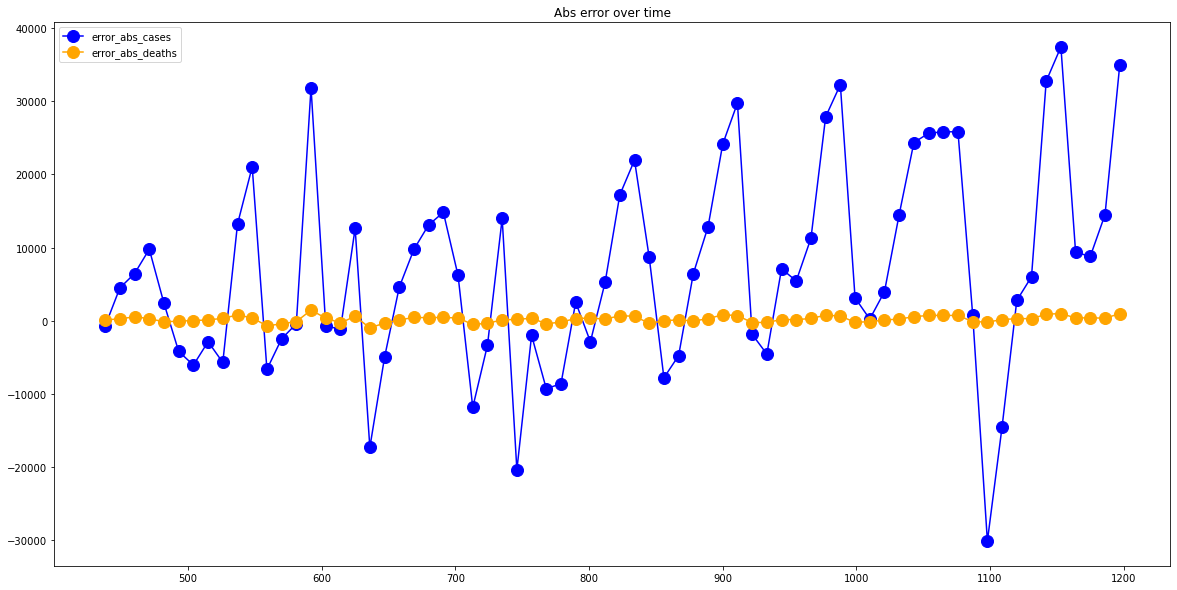

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)